In [355]:
from datetime import datetime
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math
from math import sqrt

In [356]:
parse = lambda x: datetime.strptime(x, '%Y-%m-%d')
boston_dat = pd.read_csv('/Users/AkshaysMacBookPro/Documents/MA611/boston1.csv', names=['Y'], 
                         parse_dates = True , index_col = [0], date_parser=parse)

In [357]:
boston_dat

,Y
1966-01-01,41
1966-02-01,39
1966-03-01,50
1966-04-01,40
1966-05-01,43
1966-06-01,38
1966-07-01,44
1966-08-01,35
1966-09-01,39
1966-10-01,35


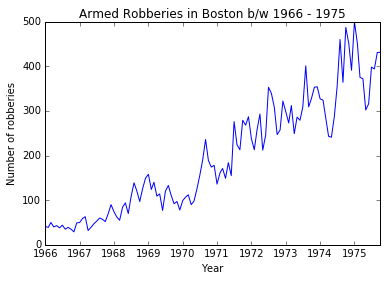

In [358]:
plt.plot(boston_dat, color='b')
plt.title('Armed Robberies in Boston b/w 1966 - 1975')
plt.xlabel('Year')
plt.ylabel('Number of robberies')

In [359]:
boston_dat.head()

,Y
1966-01-01,41
1966-02-01,39
1966-03-01,50
1966-04-01,40
1966-05-01,43


In [360]:
boston_dat.index

DatetimeIndex(['1966-01-01', '1966-02-01', '1966-03-01', '1966-04-01',
               '1966-05-01', '1966-06-01', '1966-07-01', '1966-08-01',
               '1966-09-01', '1966-10-01',
               ...
               '1975-01-01', '1975-02-01', '1975-03-01', '1975-04-01',
               '1975-05-01', '1975-06-01', '1975-07-01', '1975-08-01',
               '1975-09-01', '1975-10-01'],
              dtype='datetime64[ns]', length=118, freq=None)

In [361]:
res = sm.tsa.seasonal_decompose(boston_dat, model='additive')

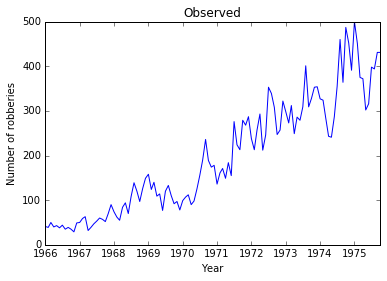

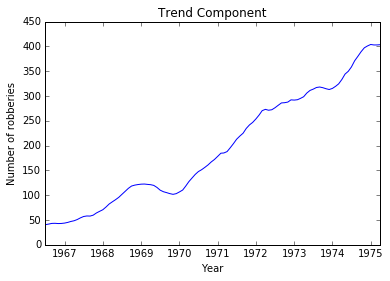

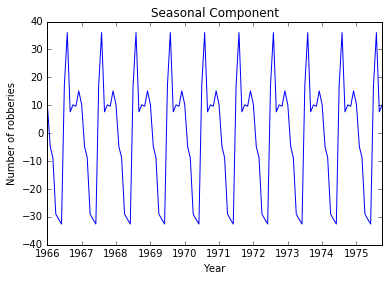

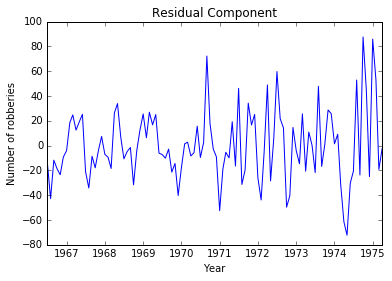

In [362]:
plt.figure(1)
plt.plot(res.observed)
plt.title('Observed')
plt.xlabel('Year')
plt.ylabel('Number of robberies')

plt.figure(2)
plt.plot(res.trend)
plt.title('Trend Component')
plt.xlabel('Year')
plt.ylabel('Number of robberies')

plt.figure(3)
plt.plot(res.seasonal)
plt.title('Seasonal Component')
plt.xlabel('Year')
plt.ylabel('Number of robberies')

plt.figure(4)
plt.plot(res.resid)
plt.title('Residual Component')
plt.xlabel('Year')
plt.ylabel('Number of robberies')

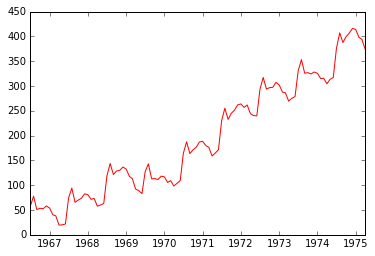

In [363]:
model = res.seasonal + res.trend
plt.plot(fit, color='r')

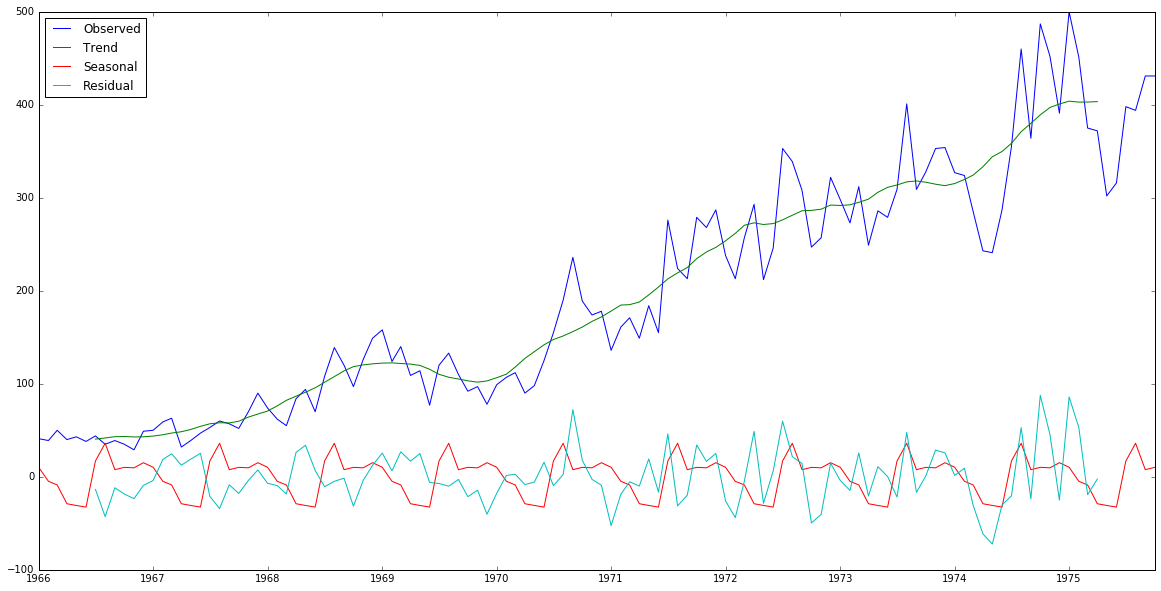

In [364]:
plt.figure(figsize=(20,10))
plt.plot(res.observed)
plt.plot(res.trend)
plt.plot(res.seasonal)
plt.plot(res.resid)
plt.legend(['Observed', 'Trend','Seasonal','Residual'], loc='upper left')

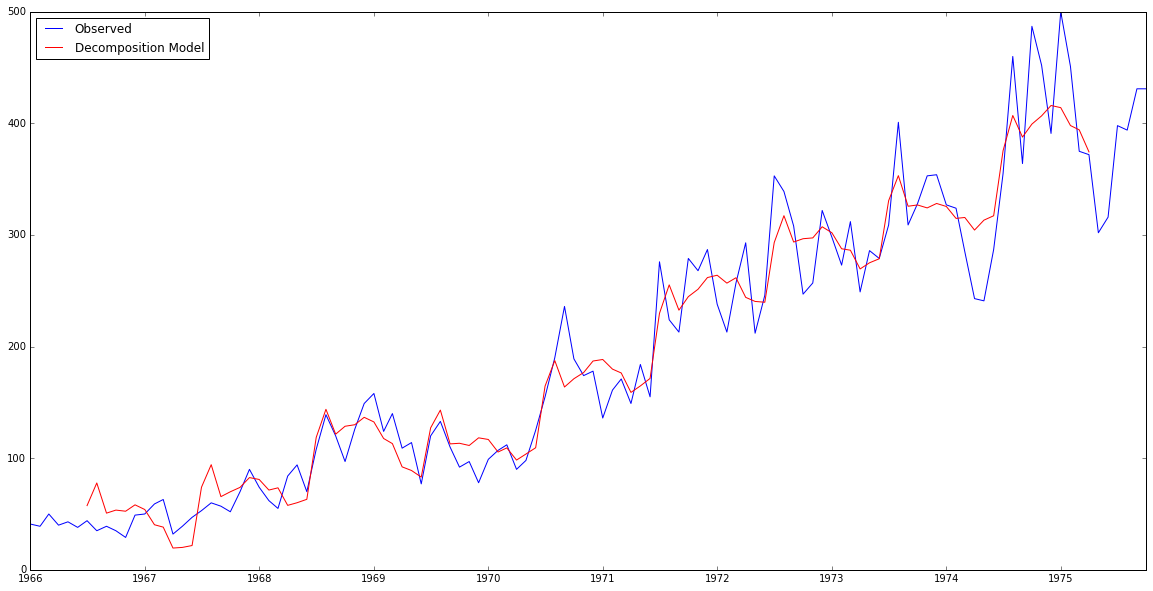

In [365]:
plt.figure(figsize=(20,10))
plt.plot(boston_dat,color='b')
plt.plot(model, color='r')
plt.legend(['Observed', 'Decomposition Model'], loc='upper left')

In [366]:
boston_dat.tail()

,Y
1975-06-01,316
1975-07-01,398
1975-08-01,394
1975-09-01,431
1975-10-01,431


In [373]:
SE = res.resid*res.resid
SSE = SE.sum()
MSE = SSE/len(SE)
RMSE = sqrt(MSE)
RMSE

27.25717033493708

In [368]:
res_multi = sm.tsa.seasonal_decompose(boston_dat, model='multiplicative')

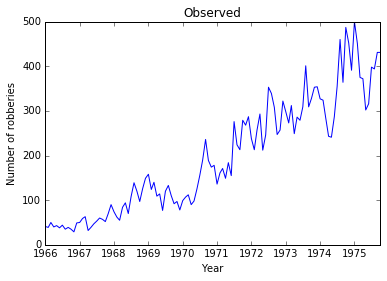

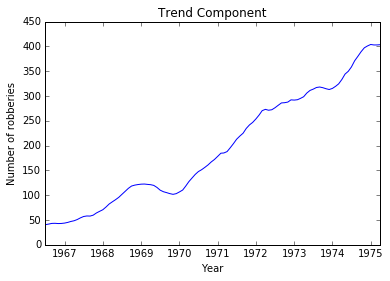

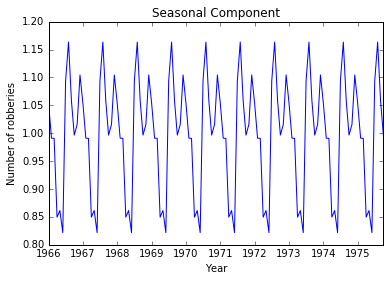

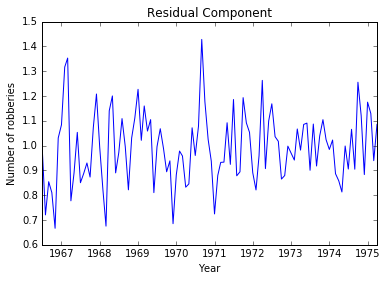

In [369]:
plt.figure(1)
plt.plot(res_multi.observed)
plt.title('Observed')
plt.xlabel('Year')
plt.ylabel('Number of robberies')

plt.figure(2)
plt.plot(res_multi.trend)
plt.title('Trend Component')
plt.xlabel('Year')
plt.ylabel('Number of robberies')

plt.figure(3)
plt.plot(res_multi.seasonal)
plt.title('Seasonal Component')
plt.xlabel('Year')
plt.ylabel('Number of robberies')

plt.figure(4)
plt.plot(res_multi.resid)
plt.title('Residual Component')
plt.xlabel('Year')
plt.ylabel('Number of robberies')

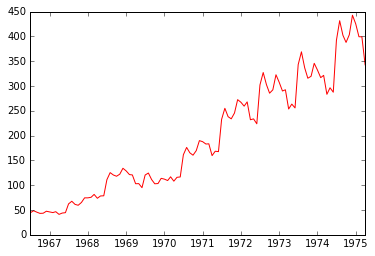

In [370]:
model_multi = res_multi.seasonal * res_multi.trend
plt.plot(model_multi, color='r')

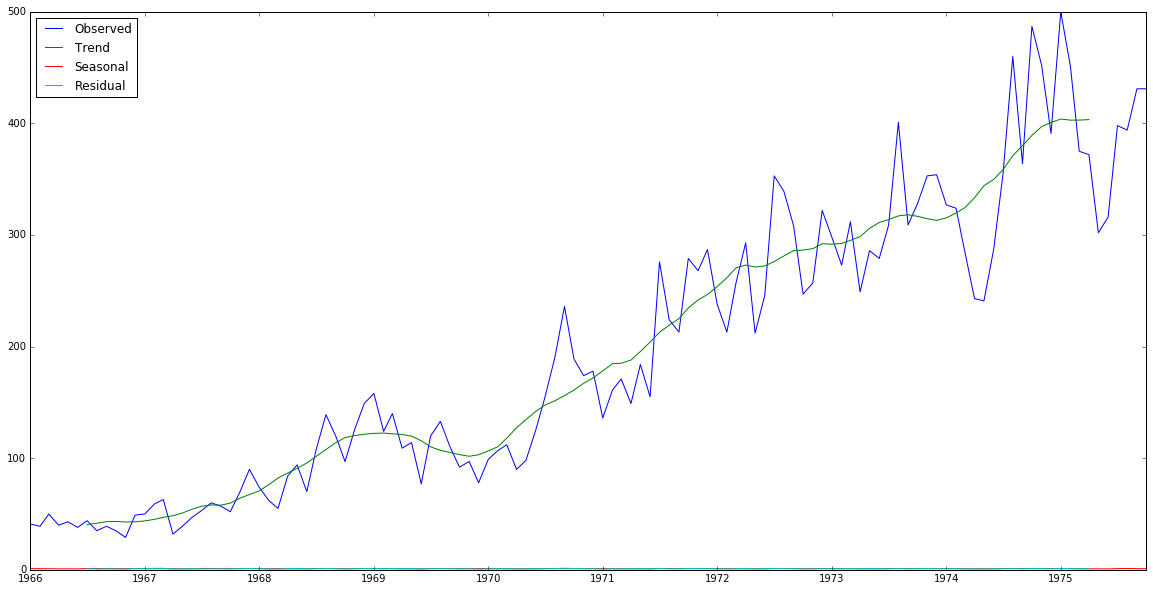

In [371]:
plt.figure(figsize=(20,10))
plt.plot(res_multi.observed)
plt.plot(res_multi.trend)
plt.plot(res_multi.seasonal)
plt.plot(res_multi.resid)
plt.legend(['Observed', 'Trend','Seasonal','Residual'], loc='upper left')

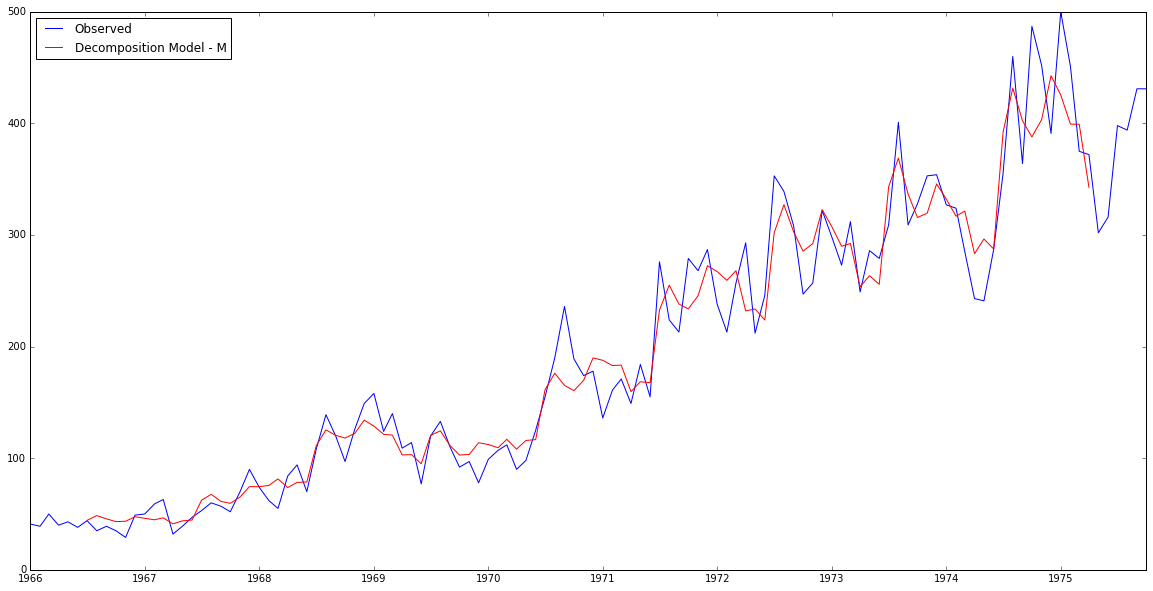

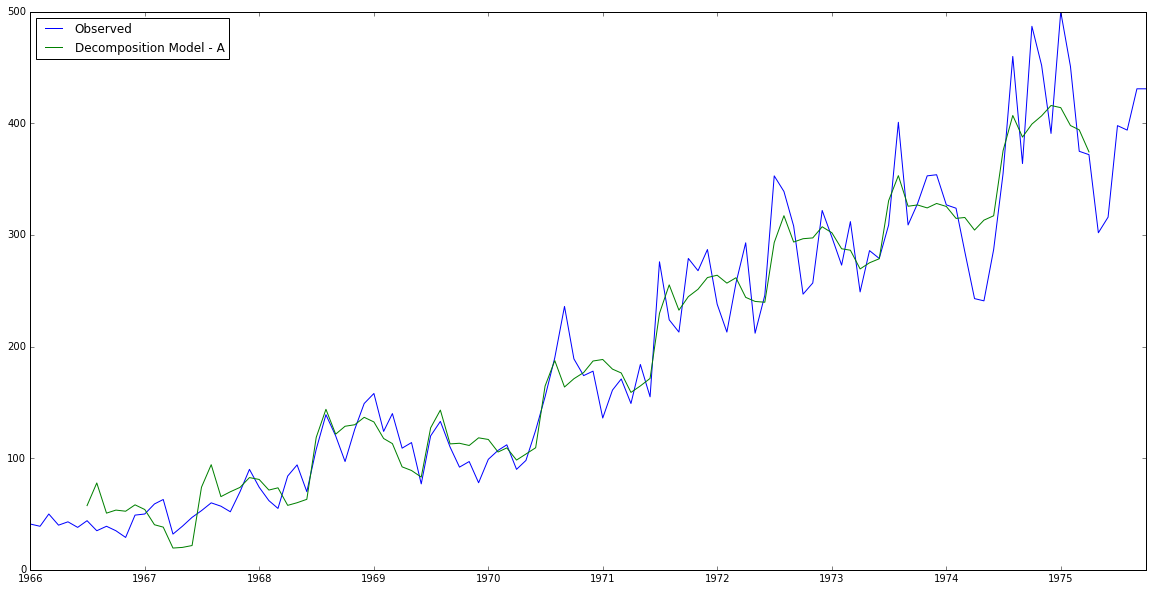

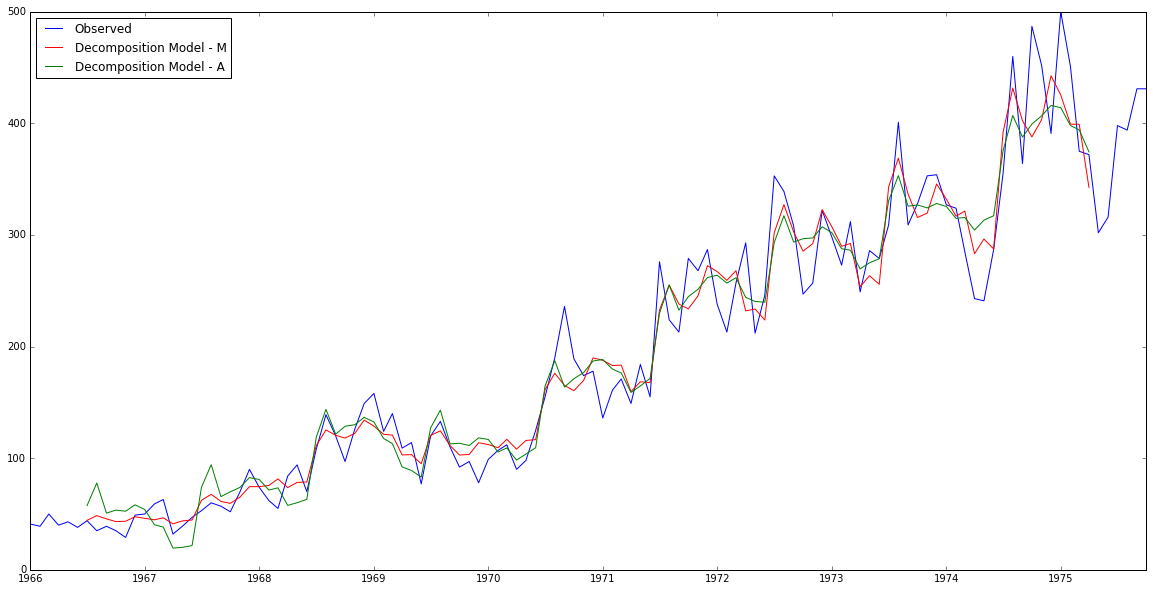

In [372]:
plt.figure(figsize=(20,10))
plt.figure(1)
plt.plot(boston_dat,color='b')
plt.plot(model_multi, color='r')
plt.legend(['Observed', 'Decomposition Model - M'], loc='upper left')

plt.figure(figsize=(20,10))
plt.figure(2)
plt.plot(boston_dat,color='b')
plt.plot(model,color = 'green')
plt.legend(['Observed', 'Decomposition Model - A'], loc='upper left')

plt.figure(figsize=(20,10))
plt.figure(3)
plt.plot(boston_dat,color='b')
plt.plot(model_multi, color='r')
plt.plot(model,color = 'green')
plt.legend(['Observed', 'Decomposition Model - M','Decomposition Model - A'], loc='upper left')

In [386]:
E_multi = boston_dat-model_multi
SE_multi = E_multi*E_multi
SSE_multi = SE_multi.sum()
MSE_multi = SSE_multi/len(SE_multi)
RMSE_multi = sqrt(MSE_multi)
RMSE_multi

25.694148298917856